# Linear Regression from Scratch

**Author: Sohan Ghosh<br>
Date: 08/10/2020**

### A) Linear Regression using Closed Form Solution 

Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold

`Load Dataset`

In [2]:
data = pd.read_csv("Data_Table.txt" , header=None, names=['Size', 'Beds', 'Price'])
data = np.array(data)

Consider the best fitted line (or rather plane in this case) to be:
$ y = m_{1}^*x_1 + m_{2}^*x_2 + c^* $

`Prepare Data`

$A$ is the matrix of data values with a column of $1$s appended to it for the bias term<br>
$b$ is the array of target values

In [3]:
b = data[:,2].reshape(data.shape[0],1)
A = np.concatenate((data[:,:2], np.ones((data.shape[0], 1))), axis=1)

Our aim is to solve the equation $Az^* = b$, where $z^* = (m^*_1, m^*_2, c^*)$. <br>

**Closed Form Solution:** $z^* = (A^TA)^{-1}A^Tb$

In [4]:
z = inv(A.T @ A) @ A.T @ b

In [5]:
z

array([[ 0.00362953],
       [ 1.67818099],
       [-1.9252501 ]])

The required closed form solution is $z^* = (0.00362953, 1.67818099, -1.9252501)$.

**Loan value** for $(x_1, x_2) = (950, 2)$

In [6]:
y1 = (z[0] * 950 + z[1] * 2 + z[2]).item() # Loan amount
y1

4.8791636552677415

**Loan value** for $(x_1, x_2) = (1050, 3)$

In [7]:
y2 = (z[0] * 1050 + z[1] * 3 + z[2]).item() # Loan amount
y2

6.920297462817165

### B) Linear Regression using Gradient Descent

 *Function for evaluating the cost of the model for given $X$, $Y$ and Weights $W$*

In [8]:
# Compute cost of model
def evaluateCost(X, Y, W):
    return (1/(2 * len(X))) * np.sum(np.power(np.matmul(X, W.T) - Y, 2))

*Function to train the Linear Regression Model using `Gradient Descent` given data points $X$, $Y$ with a `Learning Rate` = $lr$, `No of Iterations` = $epoch$*

In [9]:
def gradientDescent(X, Y, lr, epochs):
    W = np.zeros((1, X.shape[1]))
    n = X.shape[0]
    
    Wlist = [[] for i in range(X.shape[1])]
    Elist = []
    
    for i in range(epochs):
        error = np.matmul(X, W.T) - Y
        
        for j in range(W.shape[1]):
            delta = (1/n) * np.sum(np.multiply(error, X[:,j].reshape(n,1)))
            W[0,j] = W[0,j] - lr * delta
            Wlist[j].append(W[0,j])
        
        cost = evaluateCost(X, Y, W)
        Elist.append(cost)
    
    return W, Wlist, Elist

`Load Dataset` (Use a copy of the same dataset used in case of the Closed Form Solution)

In [10]:
A1 = A.copy()

`Standardize Dataset`

In [11]:
x1_mean = np.mean(A1[:,0])
x1_std = np.std(A1[:,0])
x2_mean = np.mean(A1[:,1])
x2_std = np.std(A1[:,1])

A1[:,0] = (A1[:,0] - x1_mean)/x1_std
A1[:,1] = (A1[:,1] - x2_mean)/x2_std

`Set Parameters`

In [12]:
l = 0.001  # The learning rate
epochs = 4000  # The number of iterations to perform gradient descent

Fit a plane using `Gradient Descent`

In [13]:
wts, wtsList, costList = gradientDescent(A1, b, l, epochs)

`Weight values`

In [14]:
wts

array([[1.35212288, 1.32177019, 6.17502497]])

**Plot of `Model Parameters` over successive iterations**

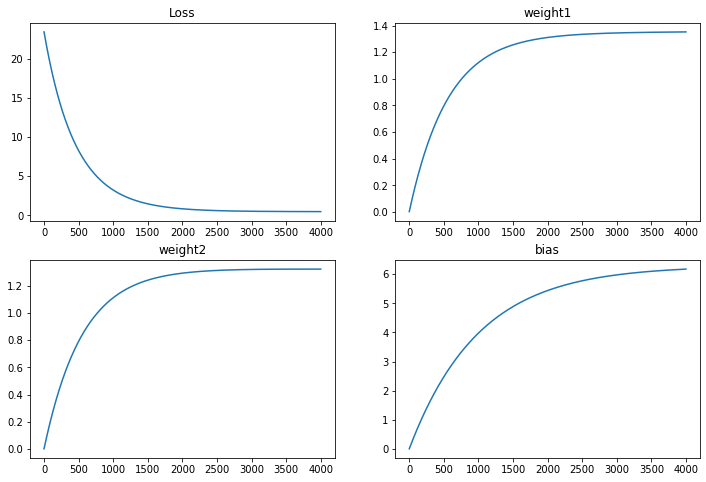

In [15]:
fig,a =  plt.subplots(2,2,figsize=(12,8))
steps = np.arange(0,epochs)
a[0][0].plot(steps, costList)
a[0][0].set_title('Loss')
a[0][1].plot(steps, wtsList[0])
a[0][1].set_title('weight1')
a[1][0].plot(steps, wtsList[1])
a[1][0].set_title('weight2')
a[1][1].plot(steps, wtsList[2])
a[1][1].set_title('bias')
plt.show()

**Loan value** for $(x_1, x_2) = (950, 2)$

In [16]:
# Apply standardization to the given point
u1 = (950 - x1_mean)/x1_std
u2 = (2 - x2_mean)/x2_std

In [17]:
y1 = wts[0,0] * u1 + wts[0,1] * u2 + wts[0,2] # Loan amount
y1

4.768631589457561

**Loan value** for $(x_1, x_2) = (1050, 3)$

In [18]:
# Apply standardization to the given point
v1 = (1050 - x1_mean)/x1_std
v2 = (3 - x2_mean)/x2_std

In [19]:
y2 = wts[0,0] * v1 + wts[0,1] * v2 + wts[0,2] # Loan amount
y2

6.820459855516002

### C) Plotting of Data Points and Estimates

**Plot of Closed Form Solution:**

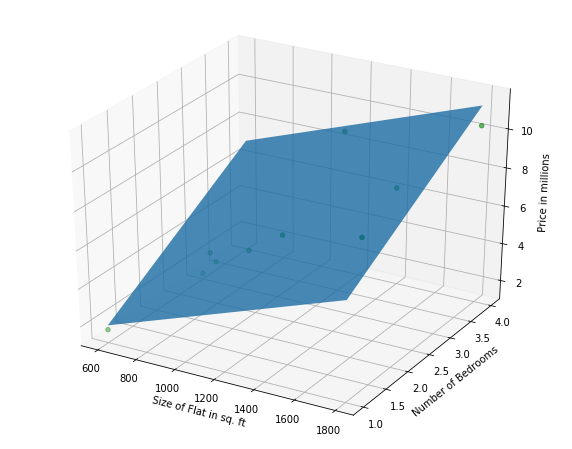

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Size of Flat in sq. ft")
ax.set_ylabel("Number of Bedrooms")
ax.set_zlabel("Price in millions")
x1 = A[:,0]
x2 = A[:,1]
x3 = b
m1 = z[0,:]
m2 = z[1,:]
c = z[2,:]
data_pts = np.array([[x1.min(),x2.min()],[x1.max(),x2.max()]])
X,Y = np.meshgrid(data_pts[:,0], data_pts[:,1])
Z = m1*X + m2*Y + c

ax.scatter(x1,x2,x3,color='g')
ax.plot_surface(X,Y,Z,alpha=0.8)
plt.show()

**Plot of Gradient Descent Solution:**

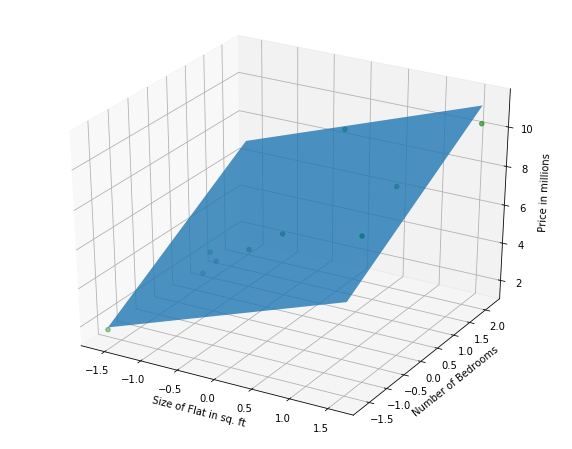

In [21]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Size of Flat in sq. ft")
ax.set_ylabel("Number of Bedrooms")
ax.set_zlabel("Price in millions")
x1 = A1[:,0]
x2 = A1[:,1]
x3 = b
m1 = wts[0,0]
m2 = wts[0,1]
c = wts[0,2]

data_pts = np.array([[x1.min(),x2.min()],[x1.max(),x2.max()]])
X,Y = np.meshgrid(data_pts[:,0],data_pts[:,1])
Z = m1*X + m2*Y + c

ax.scatter(x1,x2,x3,color='g')
ax.plot_surface(X,Y,Z,alpha=0.8)
plt.show()